In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)

# ML

In [7]:
from sklearn.ensemble import GradientBoostingRegressor #, GradientBoostingClassifier, 
from sklearn.metrics import mean_squared_error

gbm = GradientBoostingRegressor()


In [8]:
df = pd.read_csv('./data/cleaned_housing.csv')
target = df['SalePrice']
features = df.drop(['PID', 'SalePrice'], axis=1)

In [9]:
features['HouseAge'] = features['YrSold'] - features['YearBuilt']
features['LastRemod'] = features['YrSold'] - features['YearRemodAdd']
features.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True) 

# and removing correlations
features.drop(['GarageYrBlt', 'FireplaceQu', 'GarageCond', 'PoolQC', 'Fireplaces'], axis=1, inplace=True)

<AxesSubplot:>

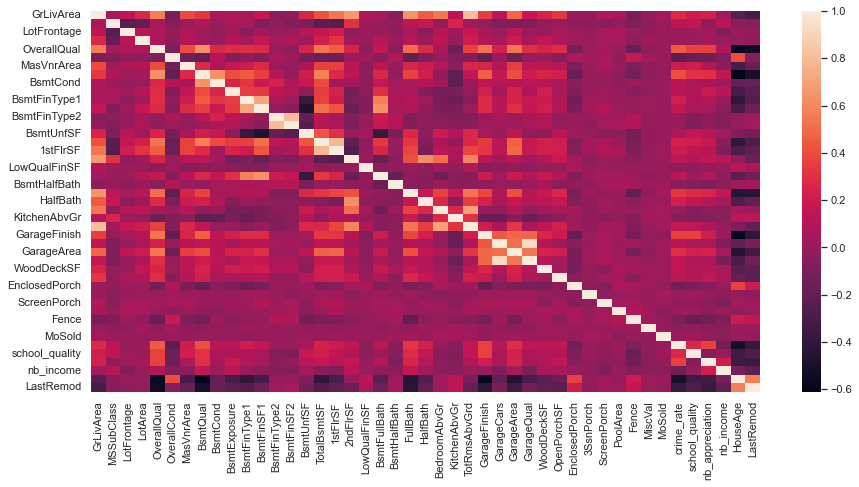

In [10]:
sns.heatmap(features.corr())

In [11]:
catCols = [col for col in features.columns if features[col].dtype=="O"]


for col in features[catCols].columns:
    le = LabelEncoder()
    le.fit(features[col])
    
    features[col] = le.transform(features[col])


In [12]:
features.drop(['BldgType', 'GarageCars', 'BsmtCond', '1stFlrSF',
               'BsmtFinType1', 'BsmtFinType2', 'Exterior2nd'], axis=1, inplace=True) 

<AxesSubplot:>

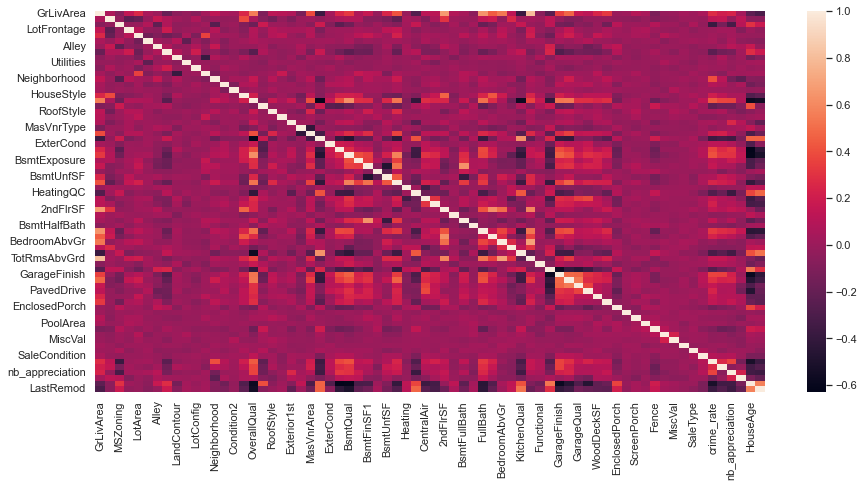

In [13]:
sns.heatmap(features.corr())

In [14]:
# features.drop(['Street', 'Condition2', 'Functional', 'Heating', 'ExterCond', 'SaleCondition',
#                 'MSZoning', 'ExterQual', 'BsmtQual', 'LandContour',
#                'SaleType', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace = True)

In [15]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = [variance_inflation_factor(features.values, i)
#                           for i in range(len(features.columns))]


# for idx, col in enumerate(features.columns):
#     print(f'{features.columns[idx]}: {vif[idx]}')

## Models

In [16]:
def tune_gbm(learning_rate, max_depth):
    gbm = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, max_depth=max_depth)
    gbm.fit(X_train,Y_train)
    
    return gbm


def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(X_train)
    gen_test  = model.staged_predict(X_test)

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, Y_train))
        testMSE.append(mean_squared_error(y_pred_test, Y_test))
    
    print(f'The best test score is {min(testMSE)} at the step {np.argmin(testMSE)+1}')
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end], color='red', label='test MSE')
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end], label='train MSE')
    
    plt.legend()
    plt.show()
    
def grid_fit(model, params, cv):
    
    grid = GridSearchCV(model, params, cv=cv, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_
    return model.fit(X_train, Y_train)

In [17]:
scaler = StandardScaler()
x_transformed = scaler.fit_transform(features)
y_transformed = scaler.fit_transform(pd.DataFrame(target))

In [18]:


X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3, random_state=0)

In [19]:
gbm = GradientBoostingRegressor(n_estimators=100)

In [20]:
params = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': ['auto'],
    'max_depth': range(3, 10),
}

model = grid_fit(gbm, params, 3)

print(f'depth: {model.max_depth}, features: {model.max_features}, learning_rate: {model.learning_rate}, \
train: {model.score(X_train, Y_train)}, test: {model.score(X_test, Y_test)}')

depth: 5, features: auto, learning_rate: 0.1, train: 0.9900981850121792, test: 0.9204453691030515


In [299]:
def grid_fit(model, params, cv):
    
    grid = GridSearchCV(model, params, cv=cv, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_
    return model.fit(X_train, Y_train)

In [358]:
for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    for max_features in ['auto', 'sqrt', 'log2']:
        for max_depth in range(3, 10):
            
            gbm = GradientBoostingRegressor(n_estimators=10000, learning_rate=learning_rate,
                                           max_features=max_features, max_depth=max_depth)

            model = gbm.fit(X_train, Y_train)

            print(f'depth: {model.max_depth}, features: {model.max_features}, learning_rate: {model.learning_rate}, \
            train: {model.score(X_train, Y_train)}, test: {model.score(X_test, Y_test)}')

depth: 3, features: auto, learning_rate: 0.0001,             train: 0.6826258576000417, test: 0.6603897537446729
depth: 4, features: auto, learning_rate: 0.0001,             train: 0.7366136628927786, test: 0.6886491370471426
depth: 5, features: auto, learning_rate: 0.0001,             train: 0.7761133316768518, test: 0.7091619298017737
depth: 6, features: auto, learning_rate: 0.0001,             train: 0.8051669658363174, test: 0.7189530262910987
depth: 7, features: auto, learning_rate: 0.0001,             train: 0.8251587303326378, test: 0.7185954434196365
depth: 8, features: auto, learning_rate: 0.0001,             train: 0.8391027034407338, test: 0.7325338702111982
depth: 9, features: auto, learning_rate: 0.0001,             train: 0.8487911213864684, test: 0.7333320511399932
depth: 3, features: sqrt, learning_rate: 0.0001,             train: 0.6350334936336909, test: 0.6196761082937463
depth: 4, features: sqrt, learning_rate: 0.0001,             train: 0.691659999774505, test: 0.6

depth: 7, features: sqrt, learning_rate: 0.1,             train: 0.9999999999999998, test: 0.9023752667886681
depth: 8, features: sqrt, learning_rate: 0.1,             train: 0.9999999999999998, test: 0.9168784375559068
depth: 9, features: sqrt, learning_rate: 0.1,             train: 0.9999999999999998, test: 0.8965396927459806
depth: 3, features: log2, learning_rate: 0.1,             train: 0.9999838647831338, test: 0.9262871802892305
depth: 4, features: log2, learning_rate: 0.1,             train: 0.9999999971341679, test: 0.9249038275001356
depth: 5, features: log2, learning_rate: 0.1,             train: 0.9999999999999998, test: 0.9168680652521306
depth: 6, features: log2, learning_rate: 0.1,             train: 0.9999999999999998, test: 0.9160864891521983
depth: 7, features: log2, learning_rate: 0.1,             train: 0.9999999999999998, test: 0.9134913065680788
depth: 8, features: log2, learning_rate: 0.1,             train: 0.9999999999999998, test: 0.9067717801672656
depth: 9, 

In [24]:
df = pd.read_csv('./data/cleaned_housing.csv')
le = LabelEncoder()
scaler = StandardScaler()

df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['LastRemod'] = df['YrSold'] - df['YearRemodAdd']
df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'PID'], axis=1, inplace=True) 

catCols = [col for col in df.columns if df[col].dtype=="O"]
df[catCols] = df[catCols].apply(le.fit_transform)

# df.drop(['GarageYrBlt', 'FireplaceQu', 'GarageCond', 'PoolQC', 'Fireplaces'], axis=1, inplace=True)
# df.drop(['BldgType', 'GarageCars', 'BsmtCond', '1stFlrSF',
#                'BsmtFinType1', 'BsmtFinType2', 'Exterior2nd'], axis=1, inplace=True) 
# df.drop(['Street', 'Condition2', 'Functional',
#                 'MSZoning', 'ExterQual', 'BsmtQual', 'LandContour',
#                'SaleType'], axis=1, inplace = True)

In [25]:
target = df['SalePrice']
features = df.drop(['SalePrice'], axis=1)

x_transformed = scaler.fit_transform(features)
y_transformed = scaler.fit_transform(pd.DataFrame(target))

X_train, X_test, Y_train, Y_test = train_test_split(
    x_transformed, y_transformed[:, 0], test_size=0.3)

In [26]:
gbm = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.1,
                                           max_features='auto', max_depth=3)

model = gbm.fit(X_train, Y_train)

sorted_importance = sorted(zip(features.columns, model.feature_importances_), key=lambda t:t[1], reverse=True)
# sorted_importance

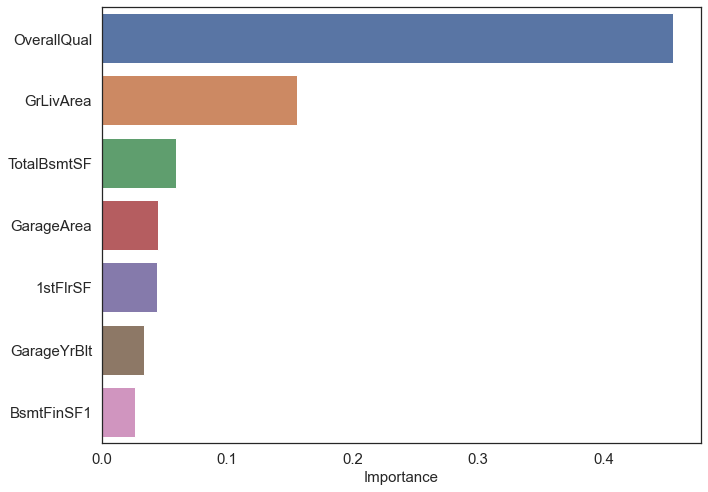

In [37]:
sns.set(rc = {'figure.figsize':(10, 7)})
sns.set_style('white')
title_fontsize = 15

data = pd.DataFrame(sorted_importance[0:7], columns=['feature', 'importance'])

fig = sns.barplot(data['importance'], data['feature'])

# plt.title('Top important Features for Gradient Boost', fontsize= title_fontsize)
plt.xlabel('Importance', fontsize = title_fontsize)
plt.ylabel('', fontsize = title_fontsize)
plt.xticks(fontsize=title_fontsize)
plt.yticks(fontsize=title_fontsize)

plt.tight_layout()
plt.savefig(f'./visualizations/Feature Importance - gb.png')
plt.show()

In [12]:
R2 = [model.score(X_test, Y_test)]
num_features = [len(features.columns)]

for idx, feature in enumerate(sorted_importance):
    
    try:
        df.drop([sorted_importance[-(idx+1)][0]], axis=1, inplace=True)
    
        target = df['SalePrice']
        features = df.drop(['SalePrice'], axis=1)

        x_transformed = scaler.fit_transform(features)
        y_transformed = scaler.fit_transform(pd.DataFrame(target))

        X_train, X_test, Y_train, Y_test = train_test_split(
            x_transformed, y_transformed[:, 0], test_size=0.3, random_state=0)

        gbm = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.1,
                                               max_features='auto', max_depth=3)

        model = gbm.fit(X_train, Y_train)
        R2.append(model.score(X_test, Y_test))
        num_features.append(features.shape[1])

        print(R2[idx], num_features[idx])
        
    except:
        pass


0.8606331643540199 82
0.9367635927894723 81
0.9338768330442683 80
0.9347648906138839 79
0.9360968052053086 78
0.9352323094543941 77
0.9353893134499738 76
0.9359810826396764 75
0.9347149730811496 74
0.934343431834005 73
0.9365086900401177 72
0.9378327161131215 71
0.9348408804755686 70
0.937513128710636 69
0.9353498272075108 68
0.9367999859735847 67
0.9363320669397885 66
0.9343708542161031 65
0.9364558012432181 64
0.939178875432987 63
0.9387882808598833 62
0.9396234706492623 61
0.9386707909057834 60
0.9387493431083094 59
0.9400088174230432 58
0.9384942886087349 57
0.9414334699571948 56
0.9391893033912674 55
0.9407593789671421 54
0.9388753878244958 53
0.9391531748176623 52
0.9346961560462677 51
0.9369064311979526 50
0.9364713642177789 49
0.9375515741644762 48
0.9356189662803434 47
0.9332037875378817 46
0.9342872318556551 45
0.9356767768004772 44
0.9363456213073892 43
0.9372438188637957 42
0.9349576899048625 41
0.9379765306545846 40
0.9349955421332241 39
0.9380247821002272 38
0.93595810348

<AxesSubplot:xlabel='features', ylabel='R2'>

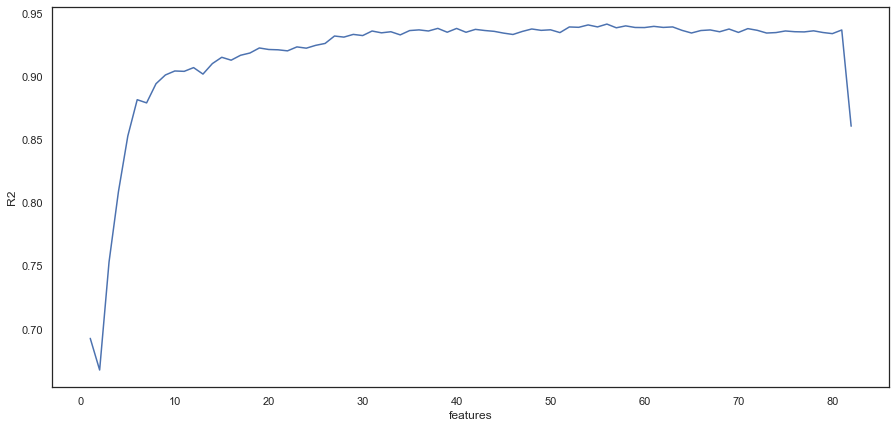

In [15]:
df2 = pd.DataFrame({'R2': R2, 'features': num_features})

sns.lineplot(df2['features'], df2['R2'])

In [18]:
df2.to_csv('./gb_Rsq_v_feat.csv')